# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> EXERCISE 2 </span>
### Exercise 2.1

In this exercise we were asked to evaluate $$\int_{0}^{1} \frac{\pi}{2}cos\big(\frac{{\pi}x}{2}\big)dx$$ utilizing a uniform distibution sampling ($p(x)=1$) and the importance sampling technique.<br>
The first graph shows the evaluation via uniform distribution sampling, while the second shows the importance sampling one.<br>
For the importance sampling method we decided to use the rect $2(1-x)$ as the probability function $p(x)$ in the interval $x \in (0,1)$ (note that the probability function needs to be normalized).<br>
Therefore the integrand function to be evaluated becomes $\frac{\pi}{2}\frac{cos(\frac{{\pi}x}{2})}{-2x+2}$. <br>
To sample p(x), we inverted its cumulative function, being careful to choose the appropriate inverse, which is $y=1-\sqrt{1-x}$, where x is uniformly distributed in $[0,1)$.<br>
As we expected, the importance sampling technique is more precise than the uniform distrubution sampling.

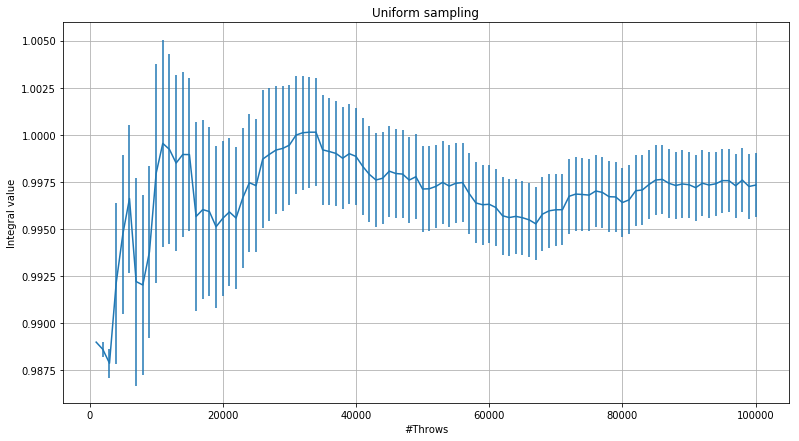

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("es2.1/es2_1_1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.title("Uniform sampling")
plt.xlabel('#Throws')
plt.ylabel('Integral value')
plt.grid(True)
plt.rcParams['figure.figsize'] = [13,7]
plt.show()

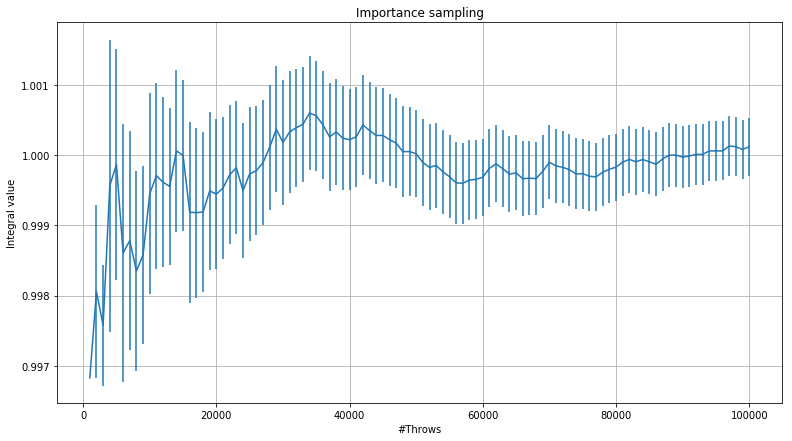

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("es2.1/es2_1_2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.title("Importance sampling")
plt.xlabel('#Throws')
plt.ylabel('Integral value')
plt.grid(True)
plt.rcParams['figure.figsize'] = [13,7]
plt.show()

### Exercise 2.2

Exercise 2.2 is about random walks. The first graph shows the mean distance from the origin as a function of the number of steps using a discreete lattice and using a step $a$ such that $|a|=1$, taken along the coordinate axes.<br>
The second graph shows the same things as the first one but using a continuous lattice; this is done by sampling the steps in spherical coordinates.<br>
The spherical coordinates are generated as suggested during the past lesson:

    double phi = rnd.Rannyu(0,2*M_PI);
    double theta = acos(1-2*rnd.Rannyu());

    x_tot += sin(theta)*cos(phi);
    y_tot += sin(theta)*sin(phi);
    z_tot += cos(theta);

Both graphs look as expected. We can clearly see that the average distance from the origin follows a law like $f(x)=k\sqrt{x}$, and that's confirmed by the almost perfect fit of a said fuction onto our data. <br>
The statistical uncertainity increases as the number of steps increases, that's to be expected since the more random steps and walks you do, the more likely you'll finish on a different point than the previous walk.

optimized parameters [k] =
[0.92334888]
parameters uncertainty =
[0.00069255]


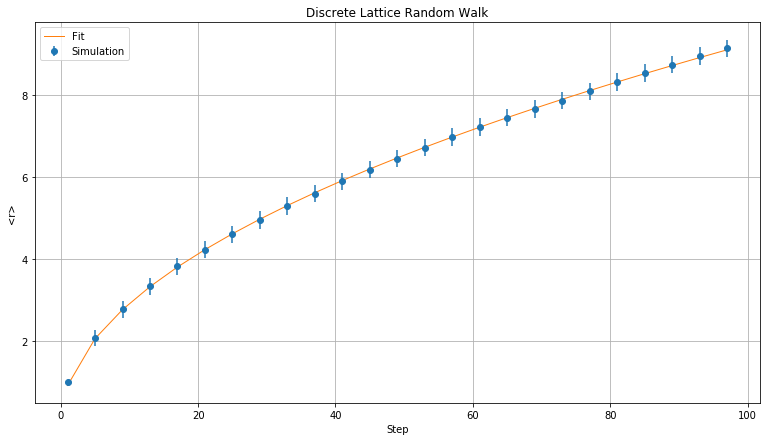

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def g(x,k):  # defining the fitting function
    return k * np.sqrt(x)

step=4
x, f, error = np.loadtxt("es2.2/es2_2_1_sm.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x[::step],f[::step],yerr=error[::step], fmt = 'o', label="Simulation")
p_opt, p_cov = curve_fit(g, x[::step], f[::step])
y_fit = g(x[::step],p_opt[0])
print("optimized parameters [k] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.plot(x[::step],y_fit, linewidth = 1, label="Fit") # plotting fitted function
plt.title("Discrete Lattice Random Walk")
plt.legend()
plt.xlabel('Step')
plt.ylabel('<r>')
plt.grid(True)
plt.show()

optimized parameters [k] =
[0.91856677]
parameters uncertainty =
[0.00081074]


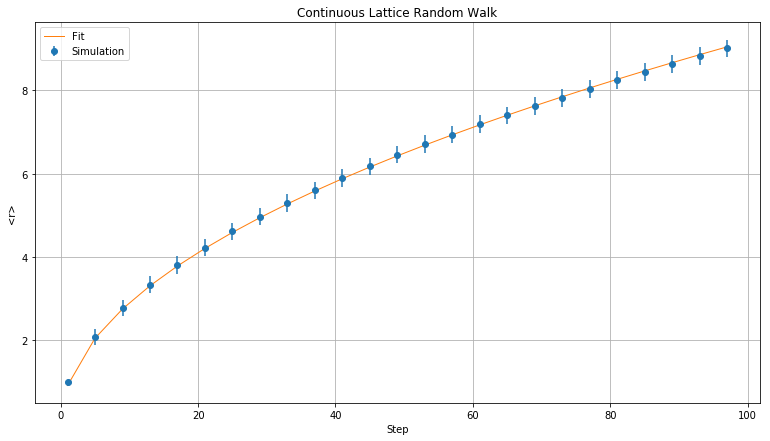

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def g(x,k):  # defining the fitting function
    return k * np.sqrt(x)

step=4
x, f, error = np.loadtxt("es2.2/es2_2_2_sm.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x[::step],f[::step],yerr=error[::step], fmt = 'o', label="Simulation")
p_opt, p_cov = curve_fit(g, x[::step], f[::step])
y_fit = g(x[::step],p_opt[0])
print("optimized parameters [k] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.plot(x[::step],y_fit, linewidth = 1, label="Fit") # plotting fitted function
plt.title("Continuous Lattice Random Walk")
plt.legend()
plt.xlabel('Step')
plt.ylabel('<r>')
plt.grid(True)
plt.show()

### Additional content on exercise 2.2

The following two graphs show the average distance of the RW over x iteration of 100 steps, the error is computed by data-blocking.<br>
Both tend to $\sim 9.2$

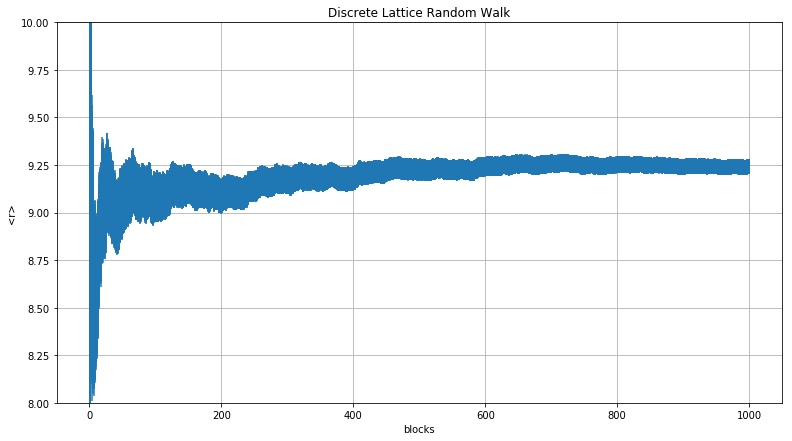

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("es2.2/es2_2_1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x/10,f,yerr=error)
plt.ylim(bottom=8, top=10)
plt.title("Discrete Lattice Random Walk")
plt.xlabel('blocks')
plt.ylabel('<r>')
plt.grid(True)
plt.show()

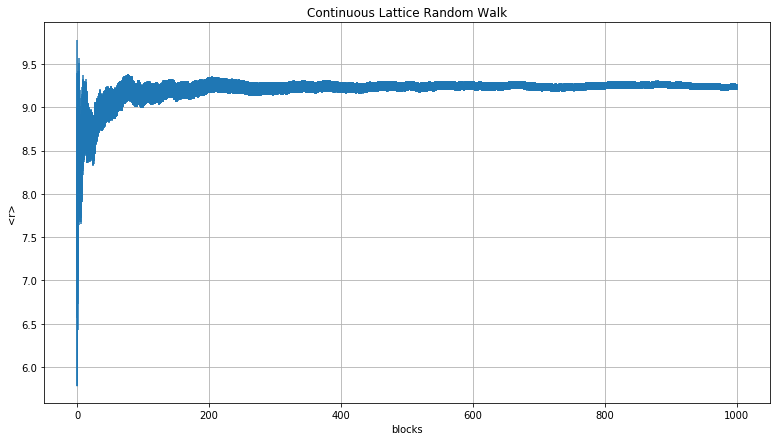

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("es2.2/es2_2_2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x/1000,f,yerr=error)
plt.title("Continuous Lattice Random Walk")
plt.xlabel('blocks')
plt.ylabel('<r>')
plt.grid(True)
plt.show()

In the following graph is shown the step-by-step distance of a generic RW

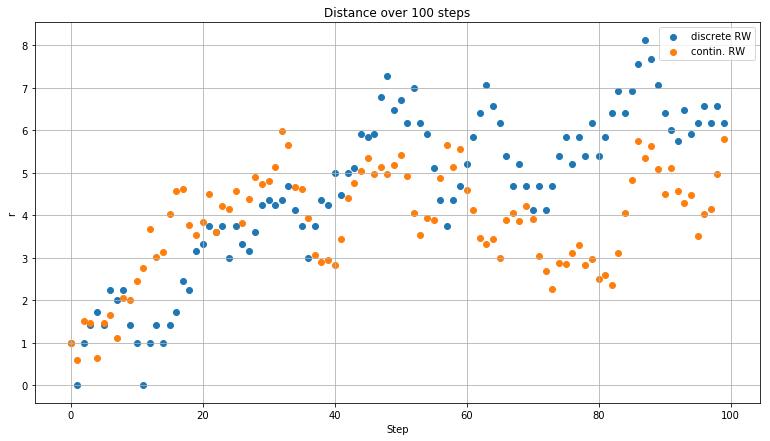

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f = np.loadtxt("es2.2/es2_2_1_step.dat", usecols=(0,1), delimiter=' ', unpack='true')
x1, f1 = np.loadtxt("es2.2/es2_2_2_step.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.scatter(x,f, label ="discrete RW")
plt.scatter(x1,f1, label ="contin. RW")
plt.xlabel('Step')
plt.ylabel('r')
plt.title("Distance over 100 steps")
plt.legend()
plt.grid(True)
plt.show()